#### Testing Hypothesis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eligible_population = [0.26, 0.74]
#Proportion of Black men
np.random.multinomial(100,eligible_population,size=1).item(0)


22

In [4]:
def one_simulated_count():
    return (np.random.multinomial(100,eligible_population,size=1).item(0))

In [5]:
counts = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

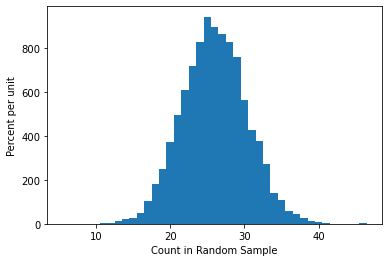

In [6]:
counts=pd.DataFrame({'Count in a Random Sample':counts})
plt.xlabel("Count in Random Sample")
plt.ylabel("Percent per unit")
plt.hist(counts,bins = np.arange(5.5, 46.6, 1))
plt.show()

Comparing the Prediction and the Data

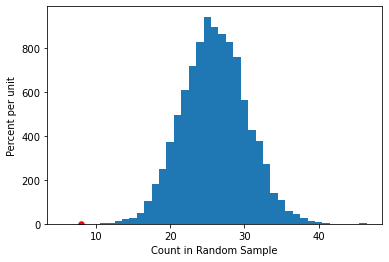

In [7]:

plt.xlabel("Count in Random Sample")
plt.ylabel("Percent per unit")
plt.hist(counts,bins = np.arange(5.5, 46.6, 1))
plt.scatter(8,0,color='red',s=30)
plt.show()

Mendel's Pea Flowers

In [8]:
def distance_from_75(p):
    return abs(100*p - 75)

In [9]:
model_proportions = [0.75, 0.25]

In [10]:
def one_simulated_count_mendel():
    return (np.random.multinomial(929,model_proportions,size=1).item(0)/929)

In [11]:
distance_from_75(one_simulated_count_mendel())

0.08073196986005371

In [12]:
def one_simulated_count_mendel():
    proportion_purple_in_sample=np.random.multinomial(929,model_proportions,size=1).item(0)/929
    return distance_from_75(proportion_purple_in_sample)
    

In [13]:
distances = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_count_mendel())

In [14]:
distances

array([0.94187298, 0.56512379, 1.74919268, ..., 0.02691066, 1.53390743,
       0.6189451 ])

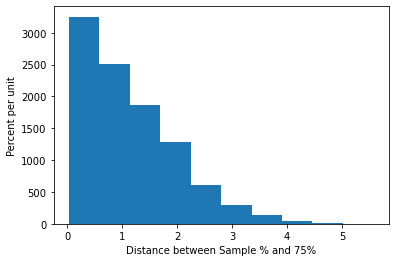

In [15]:
counts1=pd.DataFrame({'Distance between Sample % and 75%':distances})
plt.xlabel("Distance between Sample % and 75%")
plt.ylabel("Percent per unit")
plt.hist(counts1)
plt.show()

Comparing the Prediction and the Data

In [16]:
705 / 929

0.7588805166846071

In [17]:
observed_statistic = distance_from_75(705/929)
observed_statistic

0.8880516684607045

In [18]:
counts1

,Distance between Sample % and 75%
0,0.941873
1,0.565124
2,1.749193
3,0.726588
4,0.941873
...,...
9995,1.372443
9996,0.888052
9997,0.026911
9998,1.533907


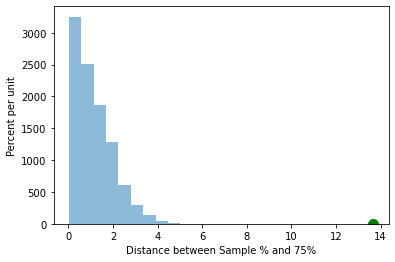

In [108]:
counts1=pd.DataFrame({'Distance between Sample % and 75%':distances})

plt.xlabel("Distance between Sample % and 75%")
plt.ylabel("Percent per unit")
plt.hist(counts1,bins=10,alpha=0.5)
plt.scatter(observed_statistic,0, color='green', s=100)




Multiple Categories

In [20]:
jury = pd.DataFrame({
    'Ethnicity':['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]})

jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


<AxesSubplot:ylabel='Ethinicity'>

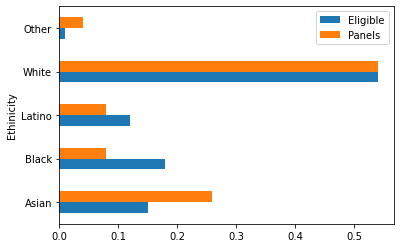

In [21]:
jury.plot(kind="barh",x = "Ethnicity",xlabel="Ethinicity")

Comparison with Panels Selected at Random 

In [22]:
eligible_population = jury['Eligible']
sample_distribution = np.random.multinomial(1453, eligible_population)/1453
jury['Random Sample']=sample_distribution
panels_and_sample=jury
panels_and_sample

,Ethnicity,Eligible,Panels,Random Sample
0,Asian,0.15,0.26,0.169305
1,Black,0.18,0.08,0.174811
2,Latino,0.12,0.08,0.105299
3,White,0.54,0.54,0.543703
4,Other,0.01,0.04,0.006882


<AxesSubplot:ylabel='Ethinicity'>

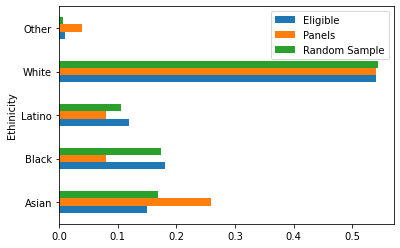

In [23]:
panels_and_sample.plot(kind="barh",x = "Ethnicity",xlabel="Ethinicity")

A New Statistic: The Distance between Two Distributions 

In [24]:
panels_and_sample["Difference"]=panels_and_sample.Panels - panels_and_sample.Eligible
panels_and_sample

,Ethnicity,Eligible,Panels,Random Sample,Difference
0,Asian,0.15,0.26,0.169305,0.11
1,Black,0.18,0.08,0.174811,-0.10
2,Latino,0.12,0.08,0.105299,-0.04
3,White,0.54,0.54,0.543703,0.00
4,Other,0.01,0.04,0.006882,0.03


In [25]:
panels_and_sample["Difference"]=np.abs(panels_and_sample.Panels - panels_and_sample.Eligible)
panels_and_sample

,Ethnicity,Eligible,Panels,Random Sample,Difference
0,Asian,0.15,0.26,0.169305,0.11
1,Black,0.18,0.08,0.174811,0.10
2,Latino,0.12,0.08,0.105299,0.04
3,White,0.54,0.54,0.543703,0.00
4,Other,0.01,0.04,0.006882,0.03


In [26]:
panels_and_sample['Difference'].sum() / 2

0.14

Simulating One Value of the Statistic

In [27]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [28]:
total_variation_distance(jury['Panels'], jury['Eligible'])

0.14

In [29]:
total_variation_distance(sample_distribution, eligible_population)

0.023007570543702647

Predicting the Statistic Under the Model of Random Selection

In [30]:
def one_simulated_tvd():
    sample_distribution = np.random.multinomial(1453, eligible_population)/1453
    return total_variation_distance(sample_distribution, eligible_population)   

In [31]:
tvds = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

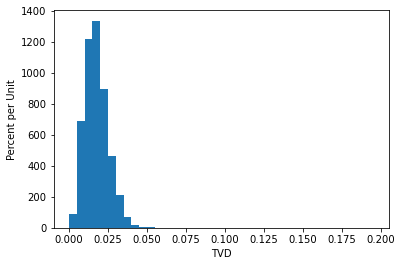

In [32]:
plt.hist(tvds,bins=np.arange(0, 0.2, 0.005))
plt.xlabel("TVD")
plt.ylabel("Percent per Unit")
plt.show()

Decisions and Uncertainty 

In [33]:
abs ( 100 * (705 / 929) - 75)

0.8880516684607045

In [34]:
scores=pd.read_csv("C:/Users/ashme/Mtech AI/FDS/Lab Assignments/CSV Files/scores_by_section.csv")
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [35]:
section_averages = scores.groupby(by='Section').mean()
section_averages

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [36]:
scores.groupby(by='Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [48]:
scores_only = pd.Series(scores['Midterm'])
scores_only

0      22
1      12
2      23
3      14
4      20
       ..
354    24
355    16
356    17
357    16
358    14
Name: Midterm, Length: 359, dtype: int64

In [55]:
random_sample = np.random.choice(scores_only,27, replace=False)
random_sample

array([ 9, 10, 13, 21, 18, 16, 15, 18, 15, 13, 17, 13, 23, 13, 22, 13, 14,
        0, 22, 22,  7, 15, 17,  0, 18,  4, 11], dtype=int64)

In [56]:
random_sample=pd.DataFrame(random_sample)
random_sample

,0
0,9
1,10
2,13
3,21
4,18
5,16
6,15
7,18
8,15
9,13


In [58]:
random_sample.mean()

0    14.037037
dtype: float64

In [59]:
def random_sample_average():
    random_sample = np.random.choice(scores_only,27, replace=False)
    return random_sample.mean()    

In [61]:
sample_averages = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

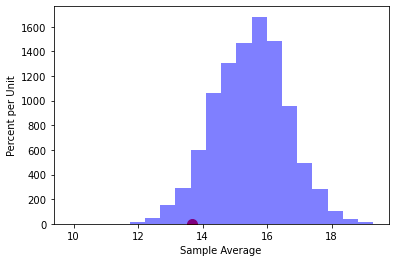

In [107]:
averages_tbl=pd.DataFrame({'Sample Average':sample_averages})
#averages_tbl
plt.hist(averages_tbl,bins=20,alpha=0.5,color='blue')

plt.xlabel("Sample Average")
plt.ylabel("Percent per Unit")

observed_statistic = 13.667
plt.scatter(observed_statistic,0,color='red',s=100)
plt.show()




P ValuesConventional Cut-offs and the P-value

In [109]:
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

0.0584